Author: Keita Watanabe

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
sns.set_context("notebook")
%matplotlib inline

Contents in this notebook:
* Basics of Digital Filter
* Inverse Filter
    * Various kinds of Inversre Filter
        * Winer Filter
            * LMS algorithm
            * Analysis of LMS algorithm
            * Computer Experiments

# Basics of Digital Filter (Non-Adaptive Filter)

## Ex. FIR Filter
FIR Filter 
$$
y(n) = \sum_{m=-0}^M x(n-m)v(m)
$$
$v(m)$ is called filter coefficients. A Super simple FIR (Low pass) Filter
$$
y(n) = \sum_{m=0}^{128} x(n-m)v(m)
$$
where filter coefficients $v(m)$ are
$$
v(m) = 1/128
$$
for $m=0 \dots 128$

In [132]:
np.random.standard_normal(10)

array([ 0.74986971, -0.05360765,  1.05948184, -1.65129473,  1.19045456,
       -0.70534692,  1.12347033,  0.8575453 ,  0.38210805, -0.77332564])

In [186]:
# create an array of 1024 points sampled at 40MHz
# [each sample is 25ns apart]
Fs = 40e6
nyq = Fs / 2
T  = 2*np.pi/Fs
t  = np.arange(0,(1024*T),T)
num_taps = 128
filter_coeff = np.ones(num_taps) / num_taps
# create an ip signal sampled at Fs, using two frequencies 
Freq  = 25e3 #  25kHz
xs = 2*np.sin(2*np.pi*Freq*t) + 1e-02*np.arange(len(t)) + np.random.standard_normal(len(t))
ds = 2*np.sin(2*np.pi*Freq*t) + 1e-02*np.arange(len(t))

In [187]:
def apply_filter(signal, filter_coeff):
    return np.convolve(signal, filter_coeff)

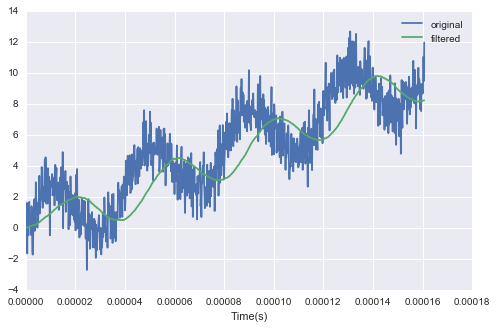

In [188]:
plt.figure(figsize=(8, 5))
plt.plot(t, xs, label="original")
plt.plot(t, apply_filter(ip_2, filter_coeff)[:1024], label="filtered")
plt.xlabel("Time(s)")
plt.legend()

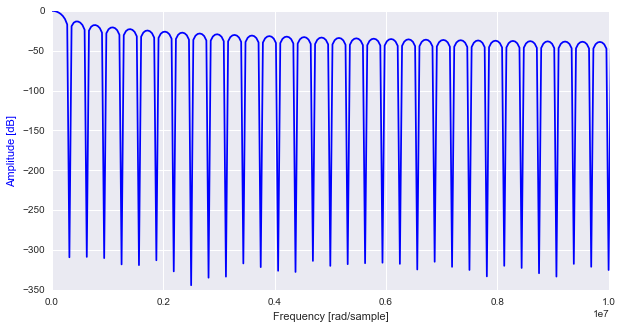

In [203]:
w, h = signal.freqz(filter_coeff)
plt.figure(figsize=(10, 5))
plt.plot((Fs/2)*w/np.pi, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.xlim((0, Freq+10e06))
plt.show()

# Wiener Filter

In [ ]:
def mywiener_filter(X, D, max_iter=100):
    """
    input:
    X: data. n rows(number of data points) and m+1 columns(features)
    D: desired responses(labels). n rows
    output:
    w: (m+1) rows learned weights of a separatorixs
    note that in this function, learning rate $\mu$ is fixed to 1
    """
    # add a column for bias parameter
    X = np.c_[np.ones(X.shape[0]), X]
    n, m = X.shape
    w = np.zeros((m, 1)) 
    iter_ = cycle(zip(X, D))
    num_iter = 0
    for x, d in iter_:
        y = np.sign(np.dot(w.T, x))
        w += (d - y)*x.reshape((m, 1))
        num_iter += 1
        if num_iter == max_iter:
            break
    return w

## Adaptive Filter

## Various kinds of Adaptive Filter

### Winer Filter

#### LMS algorithm

#### Analysis of LMS algorithm

#### Computer Experiments